# Groupe : G2 3IIR
## Numero De groupe : 10
### Participants : Saad Chihab , Taoufik Dahami

# # step 0: import of important libraries that will help us analyse our dataset !

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
#pd.set_option('max_columns',200)

# # Step1 : Data Understanding

In [88]:
df = pd.read_csv('/kaggle/input/newamazon/amazon.csv')

In [40]:
df.shape

(9668, 12)

In [41]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [42]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [66]:
df.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
duration_minutes    float64
duration_seasons    float64
dtype: object

In [67]:
df.describe()

,release_year,duration_minutes,duration_seasons
count,9668.000000,7814.000000,1854.000000
mean,2008.341849,91.311876,1.723301
std,18.922482,40.333086,1.821656
min,1920.000000,0.000000,1.000000
25%,2007.000000,75.000000,1.000000
50%,2016.000000,91.000000,1.000000
75%,2019.000000,106.000000,2.000000
max,2021.000000,601.000000,29.000000


# # Step 2: Data Preparation

In [68]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,113.0,NaN
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110.0,NaN
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,74.0,NaN
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",69.0,NaN
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,45.0,NaN


In [69]:
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,False,False,False,False,False,True,True,False,False,False,False,False,False,True
9664,False,False,False,True,False,True,True,False,False,False,False,False,True,False
9665,False,False,False,False,False,True,True,False,False,False,False,False,False,True
9666,False,False,False,True,False,True,True,False,False,False,False,False,True,False


In [70]:
df.isna().sum()

show_id                0
type                   0
title                  0
director            2083
cast                1233
country             8996
date_added          9513
release_year           0
rating               337
duration               0
listed_in              0
description            0
duration_minutes    1854
duration_seasons    7814
dtype: int64

In [72]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664    False
9665    False
9666    False
9667    False
Length: 9668, dtype: bool

In [71]:
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons


In [73]:
#check for duplicate titles 
df.loc[df.duplicated(subset=['title'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons


In [74]:
#checking if there is moviesthat has same title or same descprition 
df.duplicated(subset=['title','description']).sum()


0

# # Step 3: Feature Understanding 


In [75]:
#this is used to see how many times a specific year is occuring in the dataset
df['release_year'].value_counts()

release_year
2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: count, Length: 100, dtype: int64

Text(0, 0.5, 'frequency of occurences')

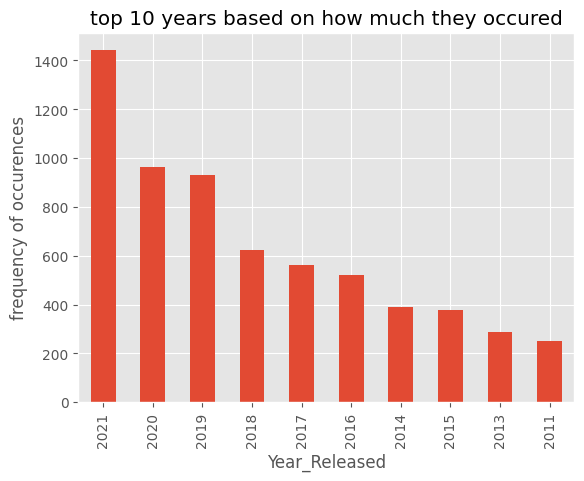

In [76]:
#this allows to find the top 10 common years and the plot() helps visualizing them in a graphe
ax=df['release_year'].value_counts()\
.head(10)\
.plot(kind='bar',title='top 10 years based on how much they occured')
ax.set_xlabel('Year_Released')
ax.set_ylabel('frequency of occurences')

Text(0.5, 0, 'Year_Released')

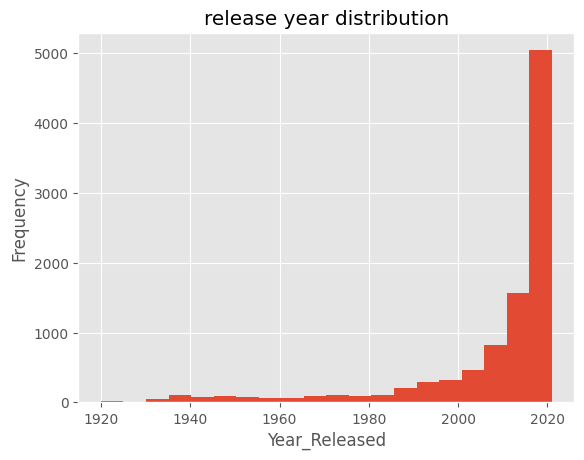

In [78]:
ax=df['release_year'].plot(kind='hist',bins=20,title='release year distribution')
ax.set_xlabel('Year_Released')


Text(0.5, 0, 'Year_Released')

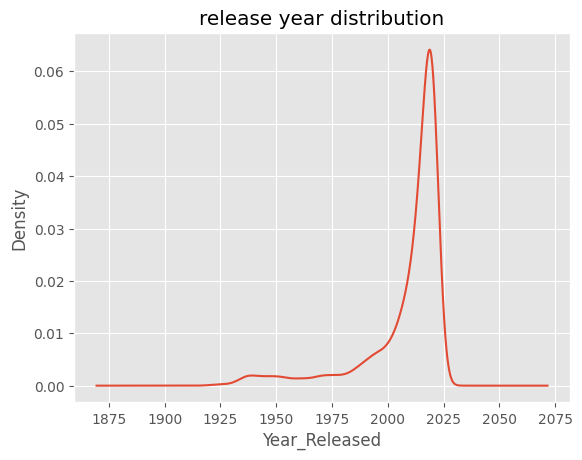

In [79]:
ax = df['release_year'].plot(kind='kde',title='release year distribution')
ax.set_xlabel('Year_Released')


# # STEP 4: Answers for some questions about the Dataset

In [80]:
print(" Top 5 of the best categories.:")
categories = df['listed_in'].apply(lambda x: pd.Series(x.split(', '))).stack().reset_index(drop=True)
top_c = categories.value_counts().head(5)
print(top_c)

 Top 5 of the best categories.:
Drama       3687
Comedy      2099
Action      1657
Suspense    1501
Kids        1085
Name: count, dtype: int64


In [81]:
print("Top 5 directors")
top_directors = df['director'].apply(lambda x: pd.Series(x).value_counts()).sum().sort_values(ascending=False).head(5)
print(top_directors)

Top 5 directors
Mark Knight              113.0
Cannis Holder             61.0
Moonbug Entertainment     37.0
Jay Chapman               34.0
Arthur van Merwijk        30.0
dtype: float64


In [83]:
print("TOP 10 actors")
actors =df['cast'].str.split(', ', expand=True).stack().value_counts()
top_actors = actors.head(10)
print(top_actors)

TOP 10 actors
Maggie Binkley        56
1                     35
Gene Autry            32
Nassar                30
Champion              29
Anne-Marie Newland    25
Prakash Raj           24
John Wayne            23
Roy Rogers            23
Danny Trejo           22
Name: count, dtype: int64


In [84]:
print("The top five TV series with the most seasons:")
tv_shows =df[df['type'] == 'TV Show']
tv_shows = tv_shows.sort_values('duration', ascending=False).head(5)
print(tv_shows['title'])

The top five TV series with the most seasons:
800        Teen Wolf
185          Vikings
1081          Scrubs
3571    'Allo 'Allo!
867            Suits
Name: title, dtype: object


In [85]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,113.0,NaN
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,110.0,NaN
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,74.0,NaN
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",69.0,NaN
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,45.0,NaN


amazon concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?


<BarContainer object of 2 artists>

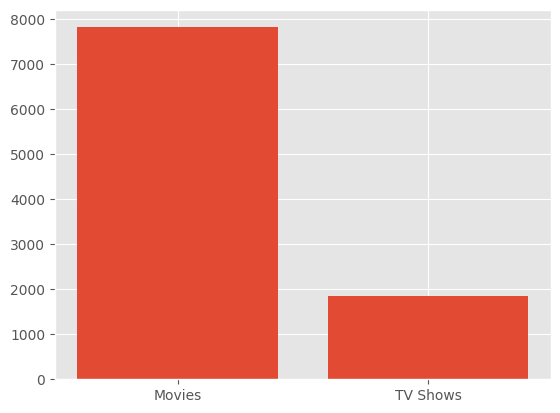

In [89]:
print("amazon concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?")
fig, ax = plt.subplots()
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
count = [len(movies), len(tv_shows)]
ax.bar(['Movies', 'TV Shows'],count, label='Amazon')

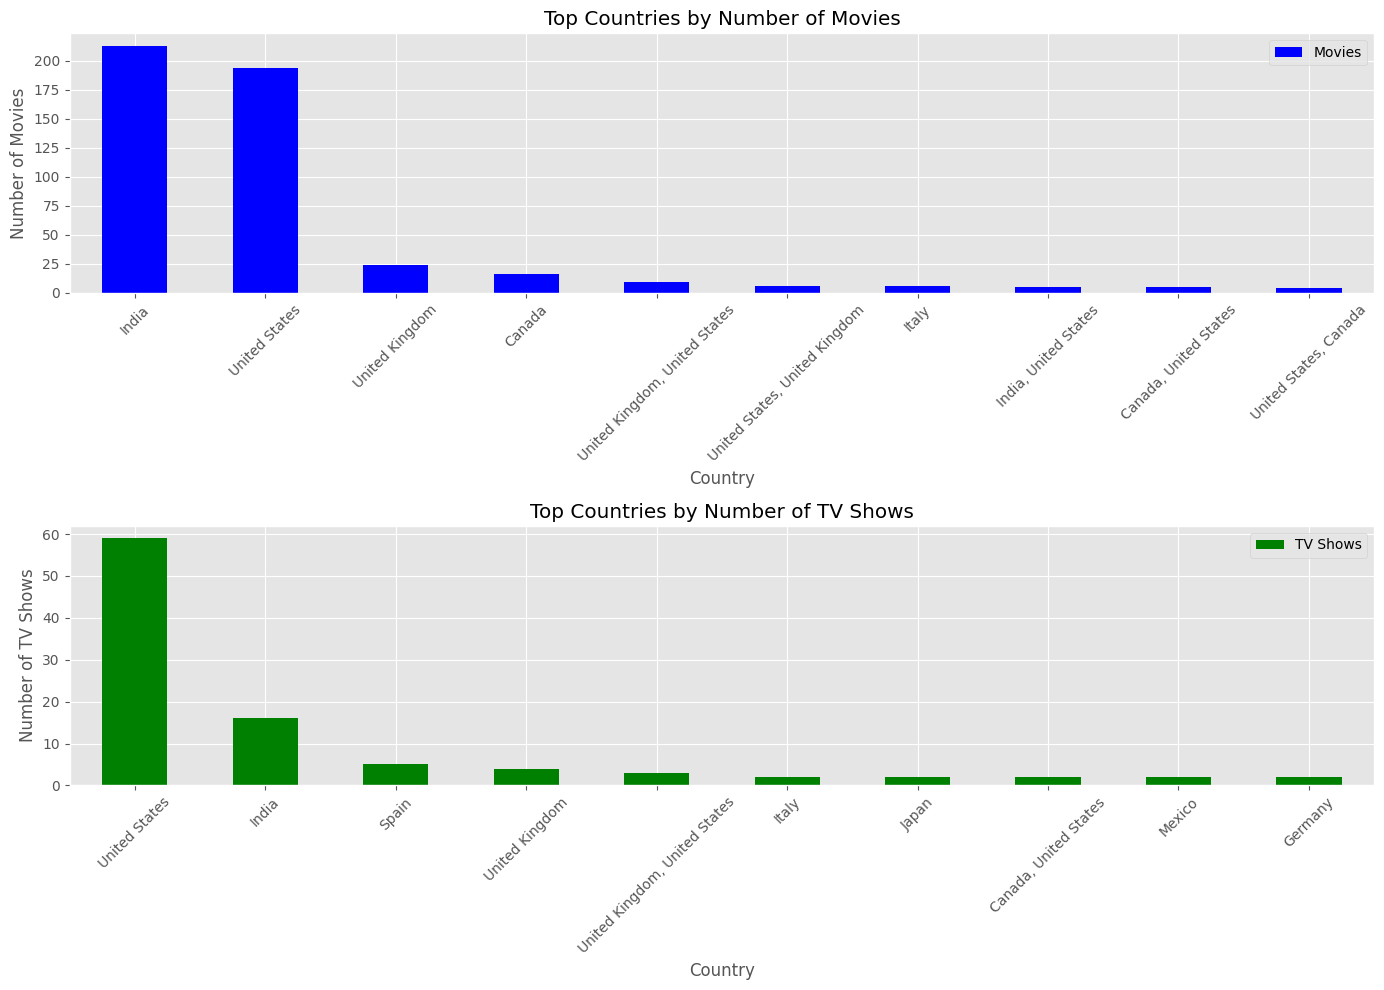

Top countries with the most movies:
country
India                            213
United States                    194
United Kingdom                    24
Canada                            16
United Kingdom, United States      9
United States, United Kingdom      6
Italy                              6
India, United States               5
Canada, United States              5
United States, Canada              4
Name: count, dtype: int64

Top countries with the most TV shows:
country
United States                    59
India                            16
Spain                             5
United Kingdom                    4
United Kingdom, United States     3
Italy                             2
Japan                             2
Canada, United States             2
Mexico                            2
Germany                           2
Name: count, dtype: int64


In [90]:
# Filter the data for movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Group by country and count the number of movies and TV shows
movies_by_country = movies['country'].value_counts()
tv_shows_by_country = tv_shows['country'].value_counts()

# Define the number of top countries to display
top_n = 10

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot for movies
movies_by_country.head(top_n).plot(kind='bar', ax=ax[0], color='blue', label='Movies')
ax[0].set_title('Top Countries by Number of Movies')
ax[0].set_ylabel('Number of Movies')
ax[0].set_xlabel('Country')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=45)

# Plot for TV shows
tv_shows_by_country.head(top_n).plot(kind='bar', ax=ax[1], color='green', label='TV Shows')
ax[1].set_title('Top Countries by Number of TV Shows')
ax[1].set_ylabel('Number of TV Shows')
ax[1].set_xlabel('Country')
ax[1].legend()
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print the countries with the most movies and TV shows
print("Top countries with the most movies:")
print(movies_by_country.head(top_n))

print("\nTop countries with the most TV shows:")
print(tv_shows_by_country.head(top_n))

In [91]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [92]:
df['duration_minutes'] = df['duration'].apply(convert_duration)

# Filter the data to include only movies
movies = df[df['type'] == 'Movie']

# Sort the movies by duration in descending order and select the top 10
top_10_longest_movies = movies.sort_values(by='duration_minutes', ascending=False).head(10)

# Display the top 10 movies with the longest duration
print("Top 10 Movies with the Longest Duration:")
print(top_10_longest_movies[['title', 'duration', 'duration_minutes']])

Top 10 Movies with the Longest Duration:
                                                  title duration  \
933   Soothing Surf at Del Norte for Sleep black screen  601 min   
3850                    Himalayan Singing Bowls 9 hours  550 min   
4087                Thunderstorm for sleep black screen  541 min   
5214         Black Screen Ocean Waves for Sleep 9 hours  541 min   
1673            Midnight Thunderstorm for Sleep 9 Hours  541 min   
4583        Gentle Tropical Rainstorm for Sleep 9 Hours  541 min   
3445            9 Hour Rainstorm for Sleep black screen  541 min   
4277      New York City's 5th Avenue at Night for Sleep  541 min   
2367          Gentle Midnight Rain black screen 9 hours  541 min   
4128                                Pacific Ocean Waves  541 min   

      duration_minutes  
933              601.0  
3850             550.0  
4087             541.0  
5214             541.0  
1673             541.0  
4583             541.0  
3445             541.0  
4277      

In [93]:
def convert_tvshow_duration(duration):
    if isinstance(duration, str) and 'Seasons' in duration:
        return int(duration.replace('Seasons', '').strip())
    elif isinstance(duration, str) and 'Season' in duration:
        return int(duration.replace('Season', '').strip())
    return None

# Apply the conversion to the duration column
df['duration_seasons'] = df['duration'].apply(convert_tvshow_duration)

# Filter the data to include only TV shows
tv_shows = df[df['type'] == 'TV Show']

# Sort the TV shows by duration in descending order and select the top 10
top_10_longest_tv_shows = tv_shows.sort_values(by='duration_seasons', ascending=False).head(10)

# Display the top 10 TV shows with the longest duration
print("Top 10 TV Shows with the Longest Duration:")
print(top_10_longest_tv_shows[['title', 'duration', 'duration_seasons']])

Top 10 TV Shows with the Longest Duration:
                                                  title    duration  \
770                                    The Amazing Race  29 Seasons   
1007                                     Silent Witness  21 Seasons   
840                                            Survivor  19 Seasons   
8071                                      Top Gear (UK)  15 Seasons   
3291                           America's Next Top Model  14 Seasons   
4125                                Paula's Best Dishes  14 Seasons   
8977  My Magic Pet Morphle - Adventures of Mila & Mo...  14 Seasons   
3005                                              Bones  12 Seasons   
9635              Pokémon the Series: Diamond and Pearl  12 Seasons   
1358                               Paula's Home Cooking  12 Seasons   

      duration_seasons  
770               29.0  
1007              21.0  
840               19.0  
8071              15.0  
3291              14.0  
4125              14.0  
